<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01794299/blob/main/Semana_8_Data_Analysis_with_Python_IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ciencia y analítica de Datos

Matrícula: A01794299

Nombre: Eunice Ornelas Rodríguez

Profesora: María de la Paz Rico

09 de noviembre de 2022

# **Semana 8: Data Analysis with Python (IBM)**

**Módulo 5 - Model Evaluation**

La evaluación de modelos nos dice cómo funciona nuestro modelo en el mundo real.
La evaluación dentro de la muestra nos dice qué tan bien nuestro modelo se ajusta a los datos ya proporcionados para entrenar
eso.
No nos da una estimación de qué tan bien el modelo entrenado puede predecir nuevos datos.


La solución es dividir nuestros datos, usar los datos In-Sample o los datos de entrenamiento para entrenar el modelo.
El resto de los datos, denominados datos de prueba, se utilizan como datos fuera de la muestra.
Estos datos se utilizan luego para aproximar el rendimiento del modelo en el mundo real.
Separar los datos en conjuntos de entrenamiento y prueba es una parte importante de la evaluación del modelo.
Usamos los datos de prueba para tener una idea de cómo funcionará nuestro modelo en el mundo real.
Cuando dividimos un conjunto de datos, generalmente la mayor parte de los datos se usa para entrenamiento y una la parte más pequeña se utiliza para la prueba.

Por ejemplo, podemos usar el 70% de los datos para entrenamiento; luego usamos el 30% para las pruebas.
Usamos un conjunto de entrenamiento para construir un modelo y descubrir relaciones predictivas.
Luego usamos un conjunto de prueba para evaluar el rendimiento del modelo.
Cuando hayamos completado la prueba de nuestro modelo, debemos usar todos los datos para entrenar el modelo.


Una función popular en el paquete de aprendizaje sci-kit para dividir conjuntos de datos es la "prueba de entrenamiento".
función "dividir".
Esta función divide aleatoriamente un conjunto de datos en subconjuntos de entrenamiento y prueba
Del fragmento de código de ejemplo, este método se importa de "validación sklearn.cross".
Los parámetros de entrada y_data es la variable de destino (en el ejemplo de evaluación de automóviles,
sería el precio), y "x_data", la lista de variables predictoras. En este caso, sería
ser todas las demás variables en el conjunto de datos del coche que estamos usando para tratar de predecir el
precio.
La salida es una matriz: "x_train" y "y_train", los subconjuntos para el entrenamiento; "x_prueba" y "y_prueba",
los subconjuntos para la prueba. En este caso, el porcentaje de "tamaño de la prueba" de
los datos para el conjunto de prueba. Aquí está el 30%. El estado aleatorio es una semilla aleatoria para aleatorio
división de conjuntos de datos.



In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=0)

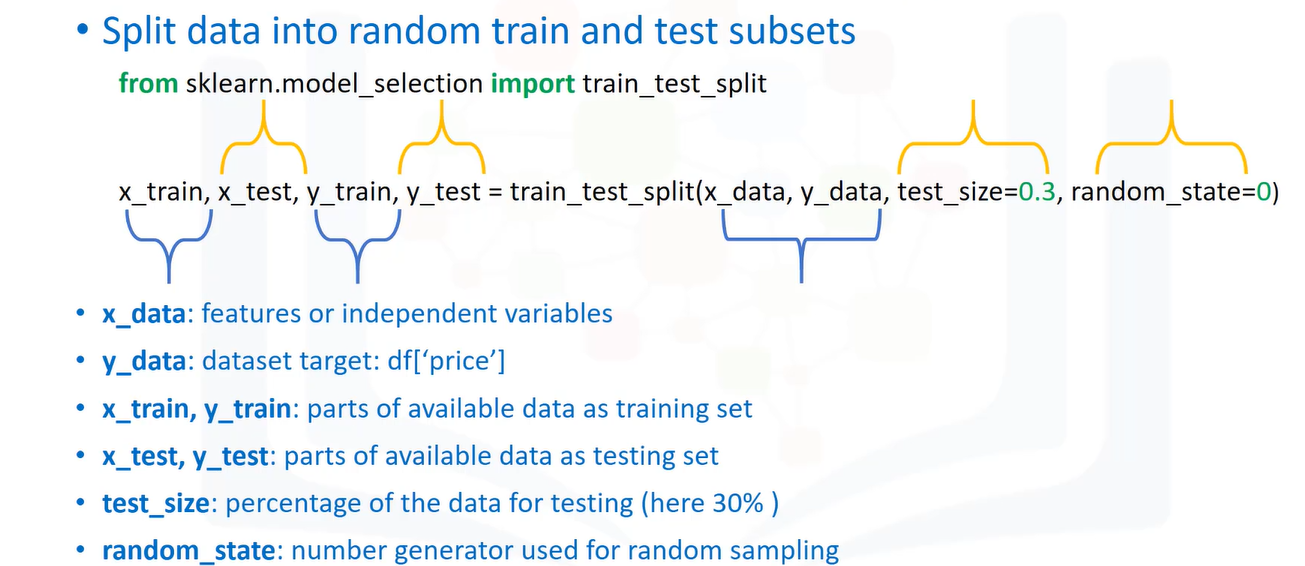

El error de generalización es una medida de qué tan bien nuestros datos predicen cosas nunca antes vistas.
datos.
El error que obtenemos usando nuestros datos de prueba es una aproximación de este error.

Vemos que las distribuciones son algo similares.
Si generamos la misma gráfica usando los datos de prueba, vemos que las distribuciones son relativamente
diferente.
La diferencia se debe a un error de generalización y representa lo que vemos en la realidad.
mundo.
El uso de una gran cantidad de datos para el entrenamiento nos brinda un medio preciso para determinar cómo funciona nuestro modelo.
funcionará en el mundo real, pero la precisión de la actuación será baja.


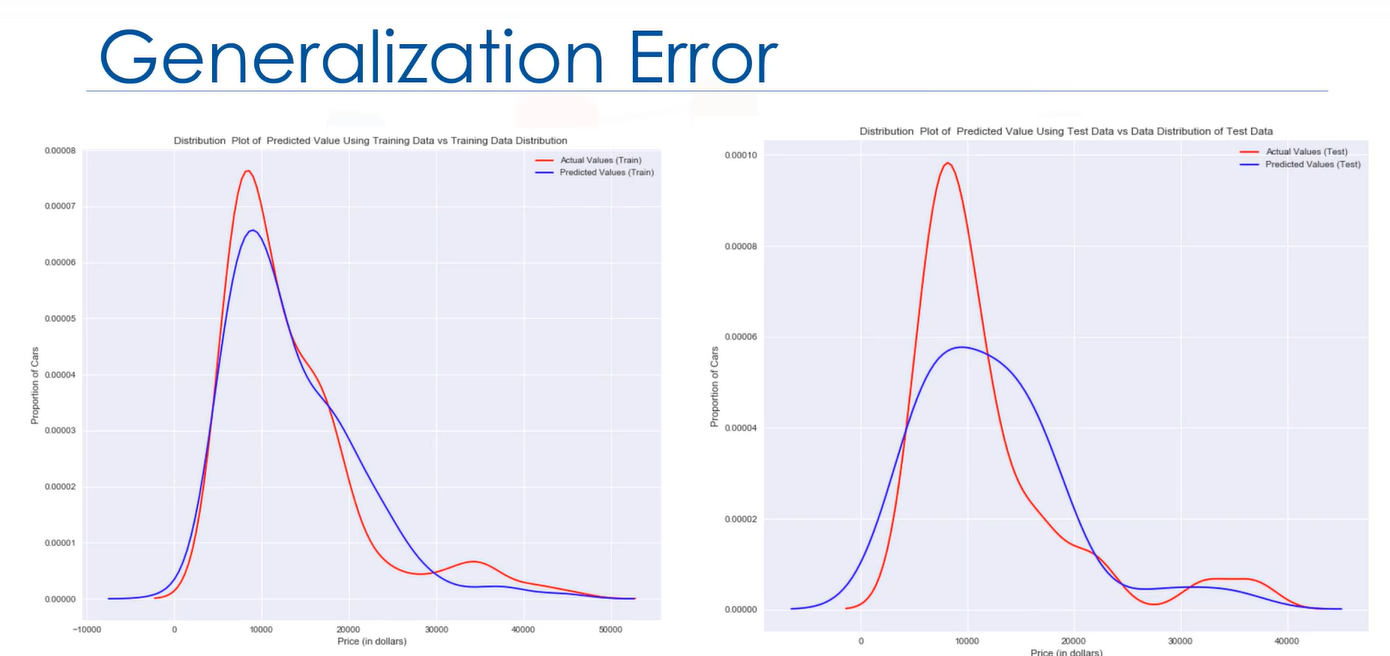

Algunos de los pliegues se pueden usar como un conjunto de entrenamiento, que usamos para entrenar el modelo, y
las partes restantes se usan como un conjunto de prueba, que usamos para probar el modelo.
Por ejemplo, podemos usar tres pliegues para entrenar; luego use un pliegue para probar.
Esto se repite hasta que cada partición se usa tanto para entrenamiento como para prueba.
Al final, usamos los resultados promedio como la estimación del error fuera de la muestra.
La métrica de evaluación depende del modelo.
Por ejemplo, el R-cuadrado.
La forma más sencilla de aplicar la validación cruzada es llamar a la función cross_val_score(),
que realiza múltiples evaluaciones 'fuera de la muestra'.
Este método se importa del paquete de selección de modelos de sklearn.
Luego usamos la función cross_val_score(). El primer parámetro de entrada es el tipo de modelo.
estamos usando para hacer la validación cruzada.

In [ ]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(lr,x_data,y_data,cv=3)
np.mean(scores)

La función cross_val_score() devuelve un valor de puntuación para indicarnos la validación cruzada
resultado.


¿Qué pasa si queremos un poco más de información? ¿Qué pasa si queremos saber la predicción real?
valores proporcionados por nuestro modelo antes de que se calculen los valores de R cuadrado?


Para hacer esto, usamos la función cross_val_predict().
Los parámetros de entrada son exactamente los mismos que los de la función cross_val_score(), pero
la salida es una predicción.

In [ ]:
from sklearn.model_selection import cross_val_predict

yhat=cross_val_predict(lr2e,x_data,y_data,cv=3)

**Under-fitting**

El objetivo de la selección del modelo es determinar el orden del polinomio para proporcionar el
mejor estimación de la función y x.
Si tratamos de ajustar la función con una función lineal, la línea no es lo suficientemente compleja como para
ajustar los datos.
Como resultado, hay muchos errores.
Esto se denomina subajuste, cuando el modelo es demasiado simple para ajustarse a los datos.


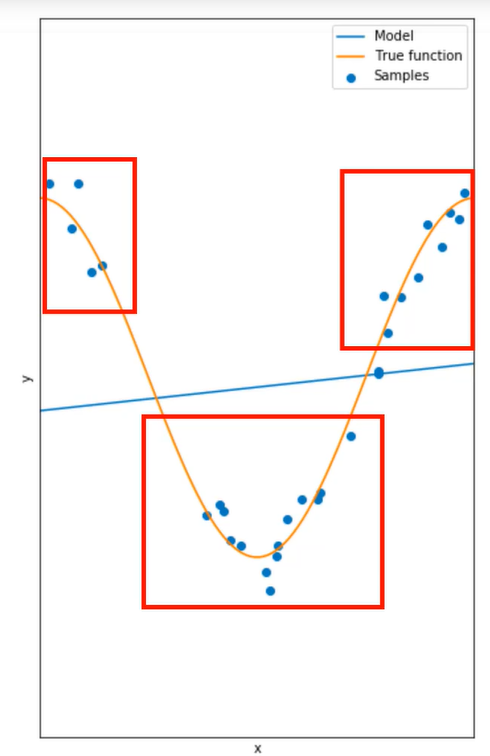

**Overt-fitting**

Si aumentamos el orden del polinomio, el modelo se ajusta mejor, pero el modelo sigue siendo
no es lo suficientemente flexible y muestra un ajuste insuficiente.
Este es un ejemplo del polinomio de octavo orden utilizado para ajustar los datos; vemos que el modelo hace
bien ajustando los datos y estimando la función, incluso en los puntos de inflexión.
Al aumentarlo a un polinomio de orden 16, el modelo funciona extremadamente bien en el seguimiento
los puntos de entrenamiento, pero se desempeña pobremente en la estimación de la función.
Esto es especialmente evidente cuando hay pocos datos de entrenamiento; la función estimada
oscila sin seguir la función.
Esto se denomina ajuste excesivo, en el que el modelo es demasiado flexible y se ajusta al ruido en lugar
que la función.

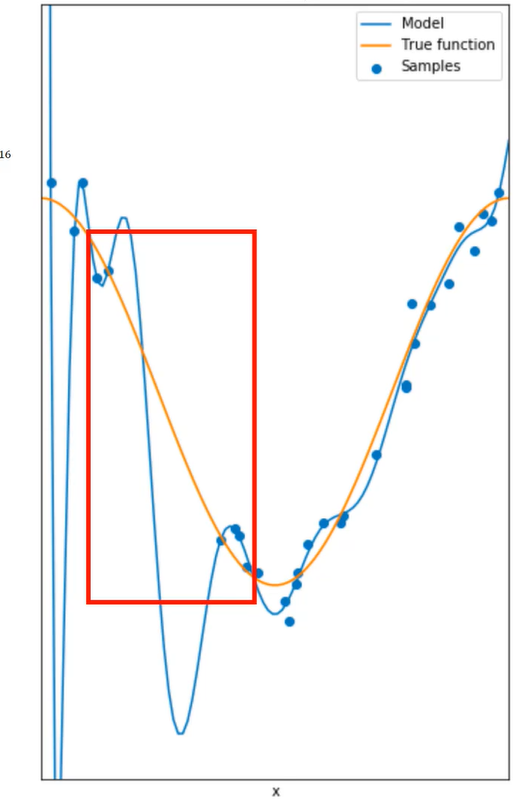

**R2**

La siguiente es una gráfica del valor R-cuadrado, el eje horizontal representa el orden de
modelos polinómicos.
Cuanto más cerca esté el R-cuadrado de 1, más preciso será el modelo.
Aquí vemos que el R-cuadrado es óptimo cuando el orden del polinomio es tres.
El R-cuadrado disminuye drásticamente cuando el orden aumenta a 4, validando nuestra inicial
suposición.
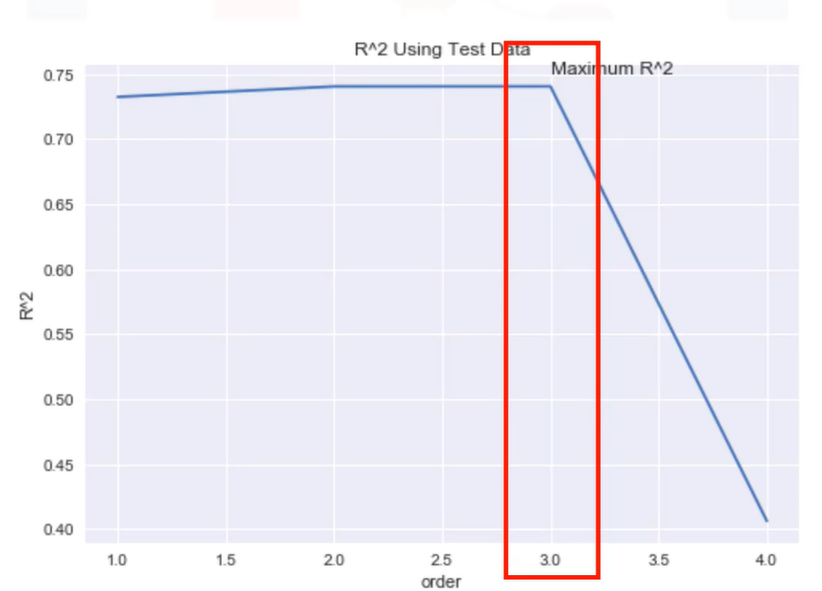


Podemos calcular diferentes valores de R-cuadrado de la siguiente manera:
Primero, creamos una lista vacía para almacenar los valores.
Creamos una lista que contiene diferentes órdenes de polinomios.
Luego iteramos a través de la lista usando un bucle. Creamos un objeto de característica polinomial con
el orden del polinomio como parámetro Transformamos los datos de entrenamiento y prueba en
un polinomio utilizando el método de transformación de ajuste. Ajustamos el modelo de regresión usando la transformada
datos.

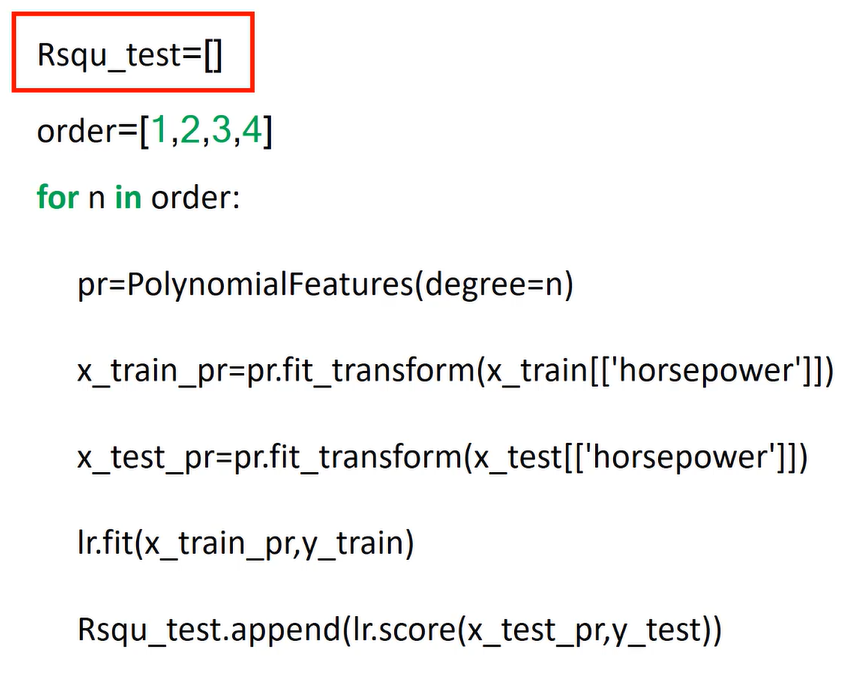

**Ridge Regression**

La regresión de ridge controla la magnitud de estos coeficientes polinómicos introduciendo
el parámetro alfa.
Alfa es un parámetro que seleccionamos antes de ajustar o entrenar el modelo.
Cada fila de la siguiente tabla representa un valor creciente de alfa.
Veamos cómo diferentes valores de alfa cambian el modelo.
Esta tabla representa los coeficientes polinómicos para diferentes valores de alfa.
Las columnas corresponden a los diferentes coeficientes polinómicos y las filas corresponden a los
diferentes valores de alfa.
A medida que aumenta alfa, los parámetros se hacen más pequeños.
Esto es más evidente para las características polinómicas de orden superior, pero se debe seleccionar alfa
con cuidado.
Si alfa es demasiado grande, los coeficientes se aproximarán a cero y se ajustarán por debajo de los datos.
Si alfa es cero, el sobreajuste es evidente.
Para alfa igual a 0,001, el sobreajuste comienza a disminuir.
Para alfa igual a 0,01, la función estimada sigue la función real.
Cuando alfa es igual a 1, vemos los primeros signos de subajuste.
La función estimada no tiene suficiente flexibilidad.
En alfa igual a 10, vemos un ajuste insuficiente extremo; ni siquiera rastrea los dos puntos.
Para seleccionar alfa usamos validación cruzada.


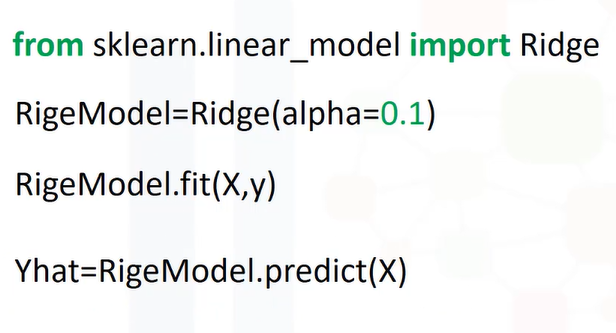

**Grid Search**

Toma el modelo o los objetos que le gustaría entrenar y diferentes valores de
los hiperparámetros.
Luego calcula el error cuadrático medio o R cuadrado para varios valores de hiperparámetros,
lo que le permite elegir los mejores valores.
Deje que los círculos pequeños representen diferentes hiperparámetros.
Empezamos con un valor para los hiperparámetros y entrenamos el modelo.
Usamos diferentes hiperparámetros para entrenar el modelo.

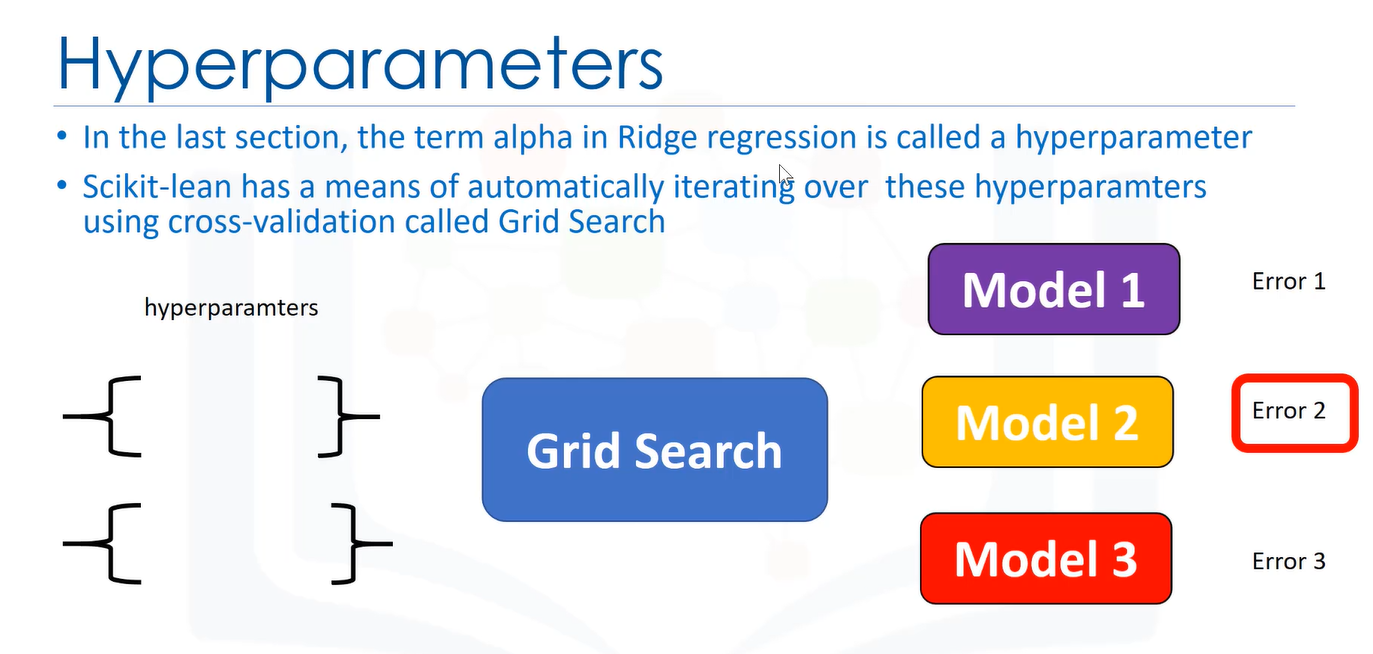


Continuamos el proceso hasta agotar los diferentes valores de parámetros libres.
Cada modelo produce un error.
Seleccionamos el hiperparámetro que minimiza el error.
Para seleccionar el hiperparámetro, dividimos nuestro conjunto de datos en tres partes, el conjunto de entrenamiento,
conjunto de validación y conjunto de prueba.
Entrenamos el modelo para diferentes hiperparámetros.
Usamos la R cuadrada o el error cuadrático medio para cada modelo.
Seleccionamos el hiperparámetro que minimiza el error cuadrático medio o maximiza el
R al cuadrado en el conjunto de validación.
Finalmente probamos el rendimiento de nuestro modelo utilizando los datos de prueba.



Grid search asume el método de puntuación, en este caso R al cuadrado, el número de pliegues,
el modelo u objeto, y los valores de los parámetros libres.
Algunas de las salidas incluyen las diferentes puntuaciones para diferentes valores de parámetros libres;
en este caso la R al cuadrado junto con los valores de los parámetros libres que tengan mejor puntuación.

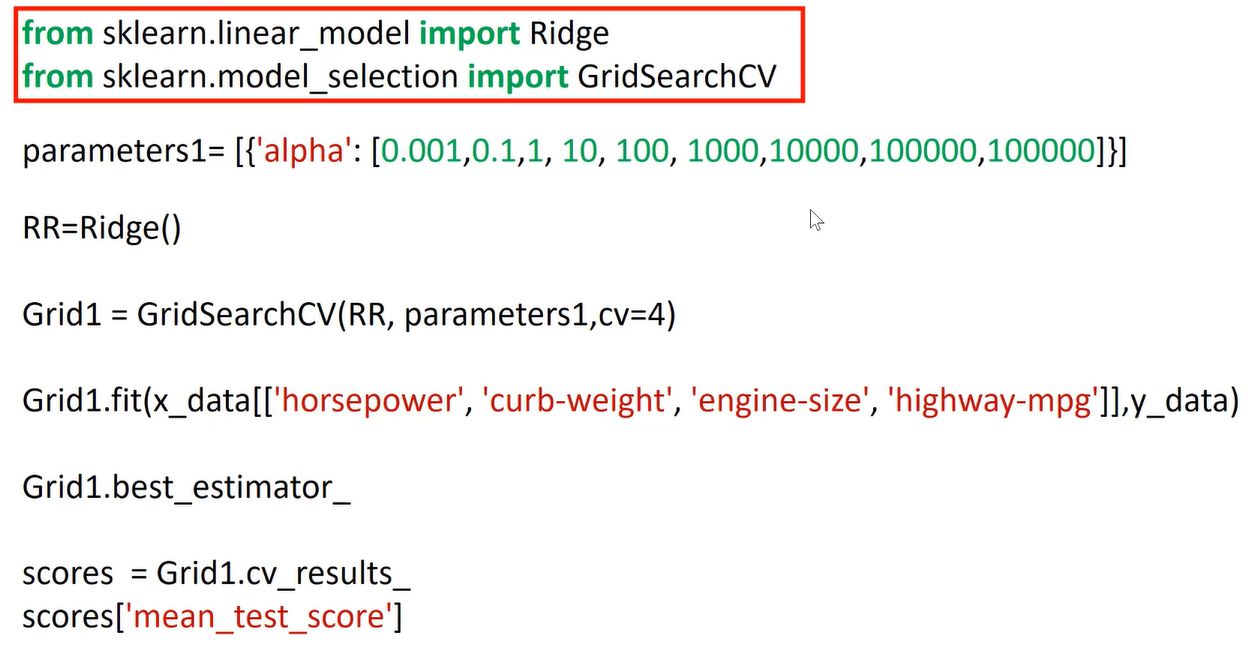

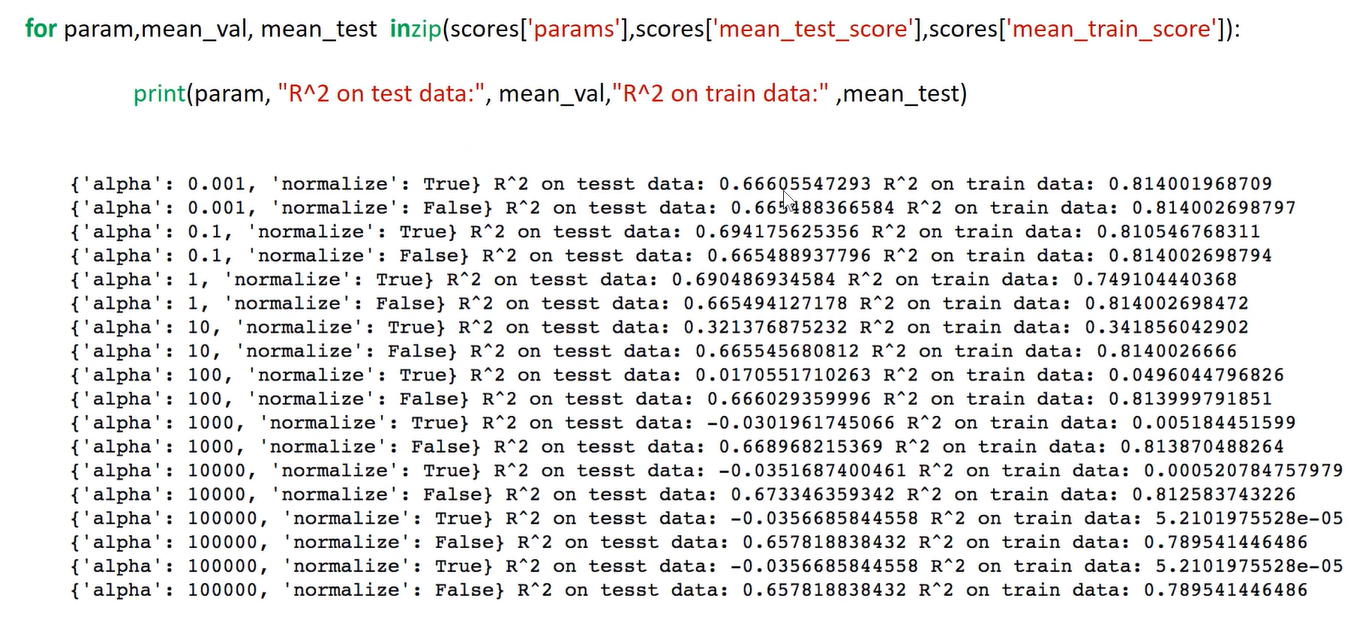

**Grade Review Questions**

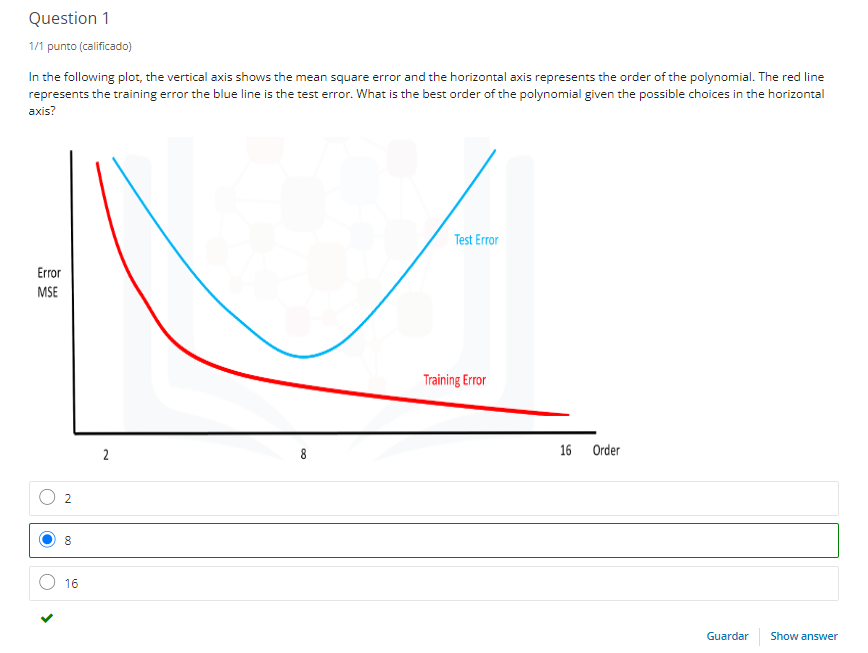

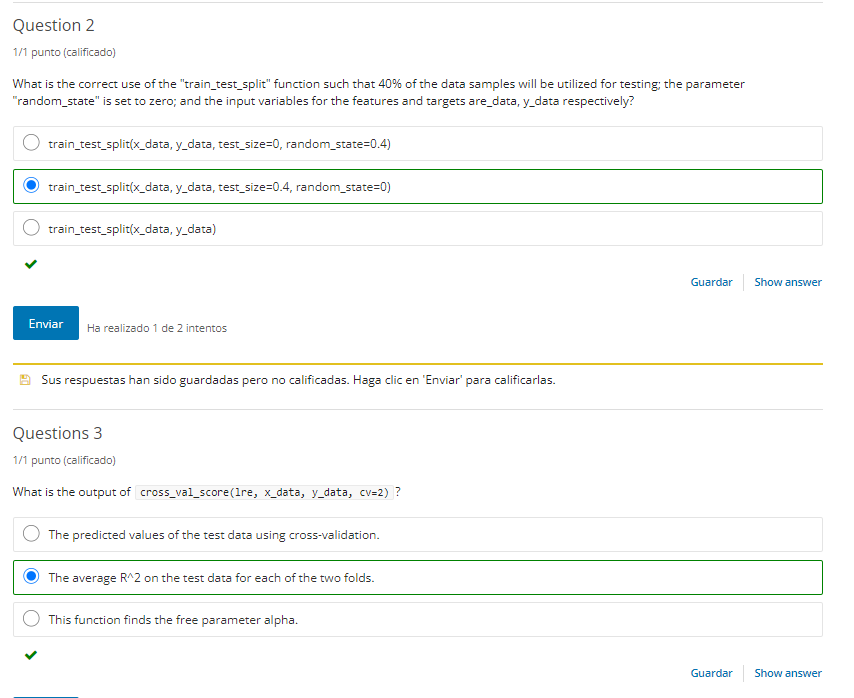

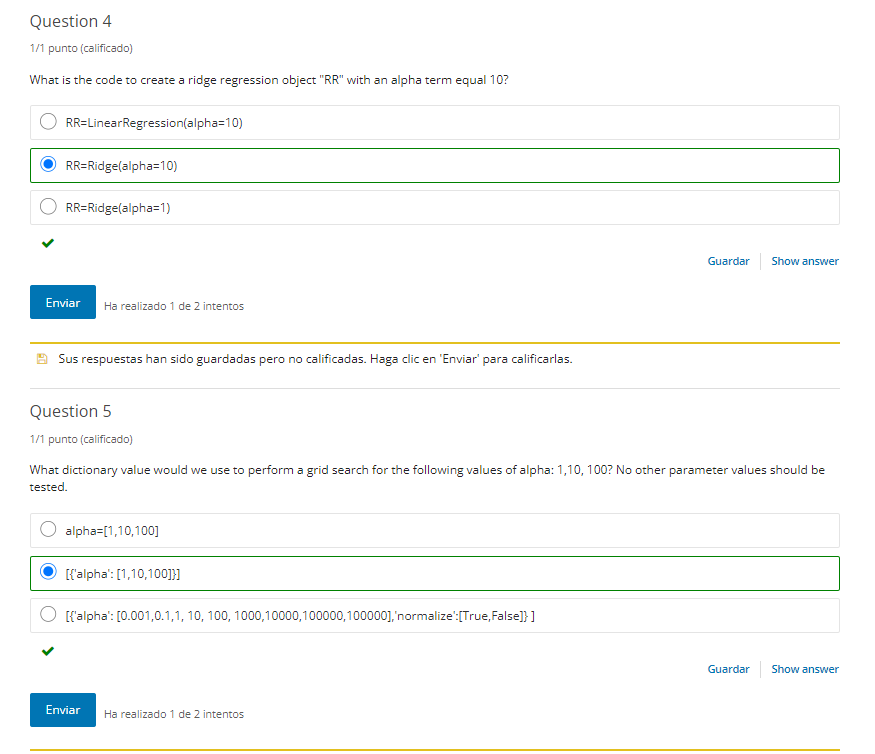

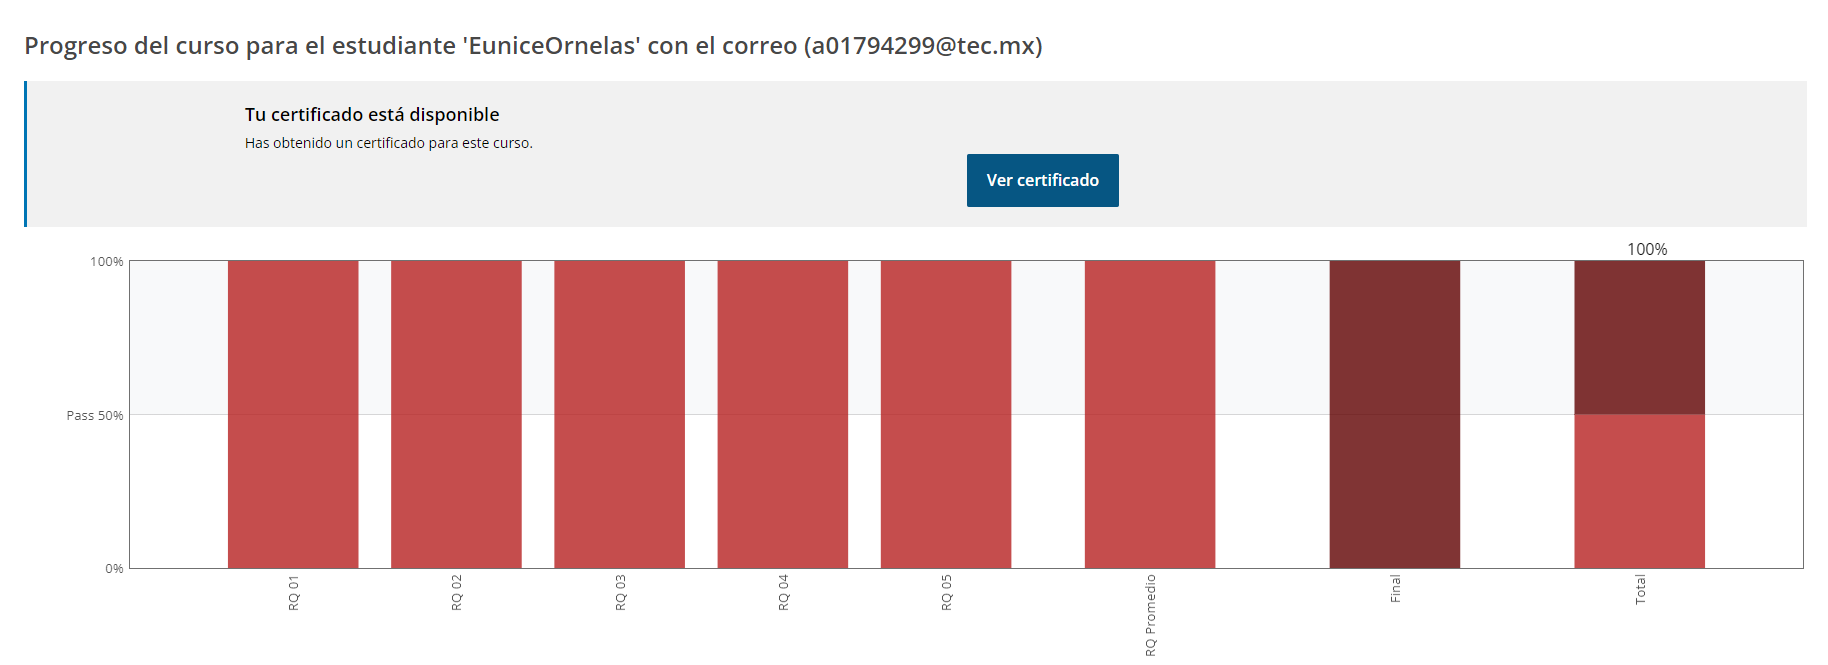

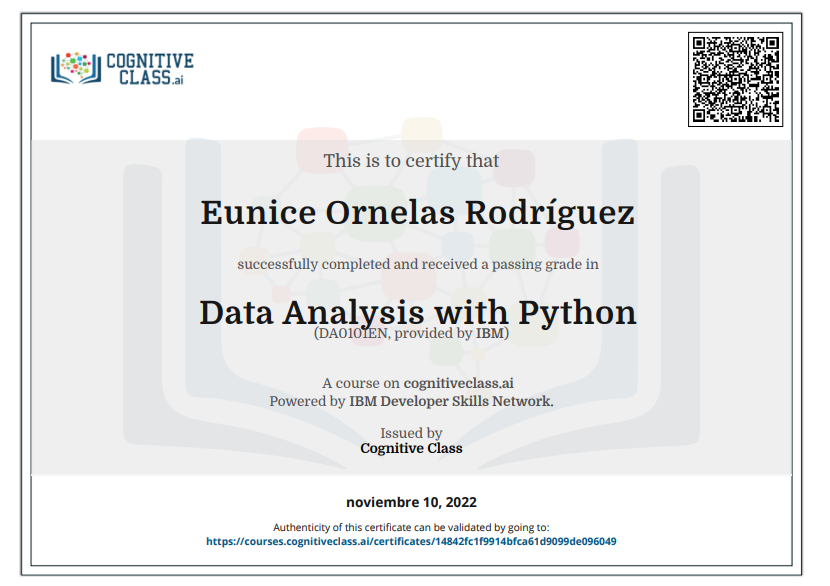

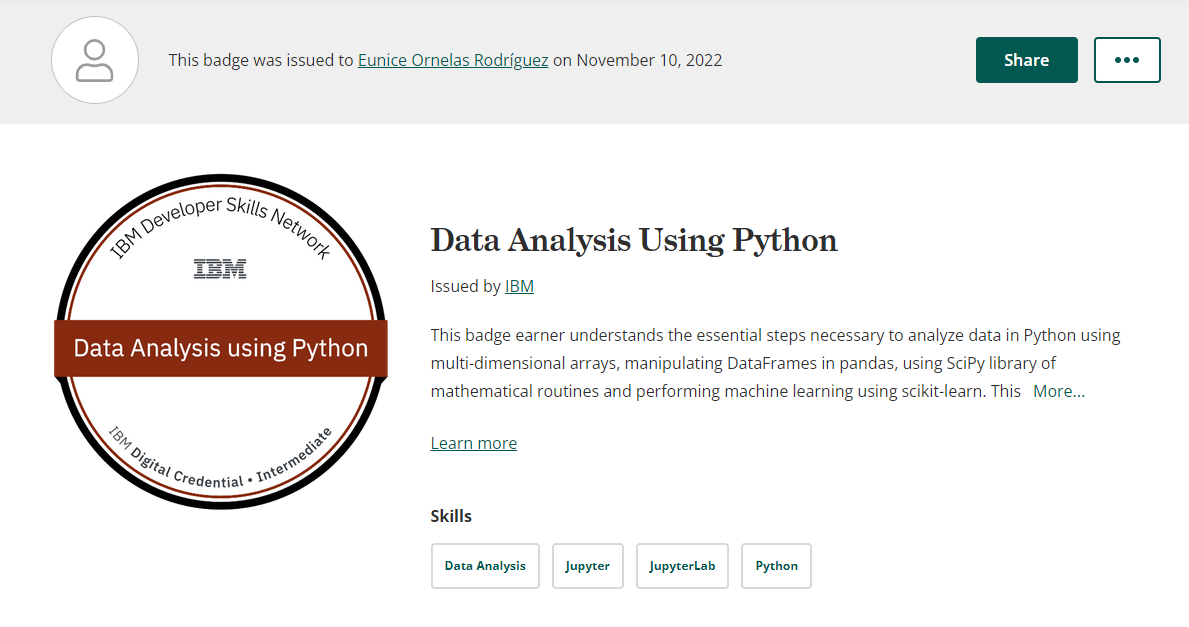